<p>
the below ECG dataset classifies ECG signal into 5 classes
this dataset is a filtered dataset obtained from physionet
Classes = [N:0, S:1, V:2, F:3, Q:4]
</p>
<p>
N: Non Ectopic beats (Normal beats)
S: Supraventrical ectopic beats
V: Ventricular ectopic beats
F: Fusion beats
Q: Unknown beats
</p>

In [62]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib and seaborn for visualization
#numpy and pandas for dataframehandling

uploading the dataset csv file

In [3]:
train_data = pd.read_csv(r"kaggle/mitbih_train.csv", header = None)
test_data = pd.read_csv(r"kaggle/mitbih_test.csv", header = None)

In [4]:
train_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


checking the data for errors

In [5]:
train_data.isnull().sum()
train_data.iloc[:, 187].unique()

array([0., 1., 2., 3., 4.])

In [6]:
train_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [7]:

train_data[187] = train_data[187].astype('int')
test_data[187] = test_data[187].astype('int') 


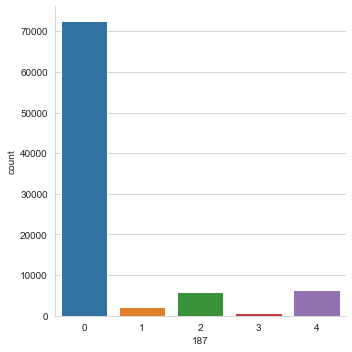

In [17]:
sns.catplot(x = 187, kind = 'count', data = train_data)

In [14]:
train_data[187].value_counts()

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

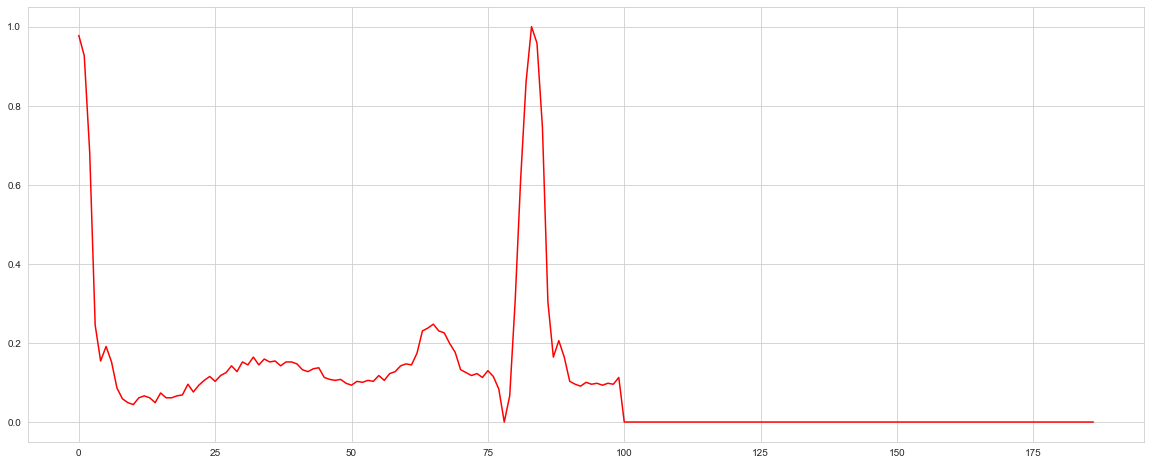

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize = (20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red')
plt.show()

dividing the dataset into sub categories

In [10]:
set_0 = train_data[train_data[187] == 0]
set_1 = train_data[train_data[187] == 1]
set_2 = train_data[train_data[187] == 2]
set_3 = train_data[train_data[187] == 3]
set_4 = train_data[train_data[187] == 4]

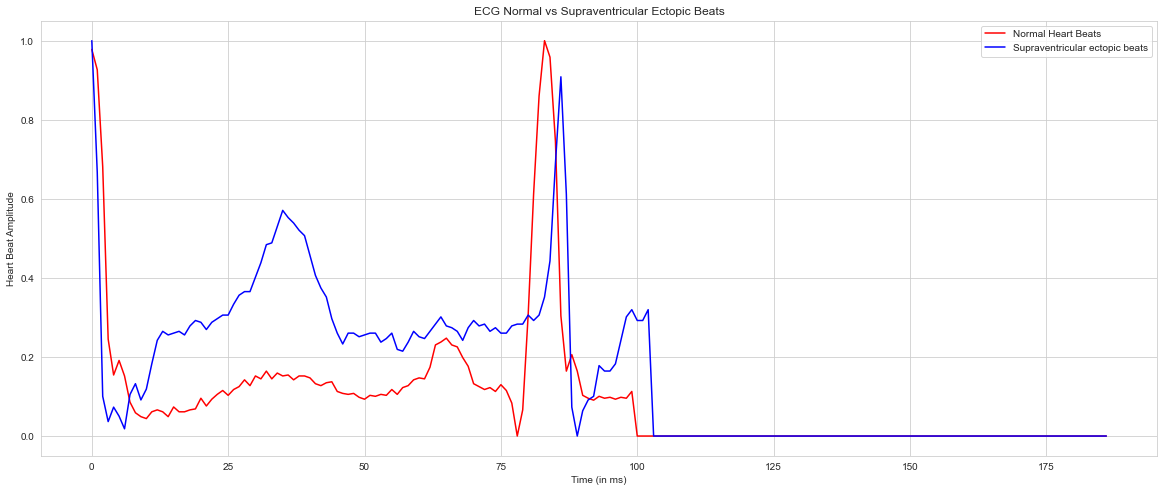

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(set_0.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(set_1.iloc[0, 0:187], color = 'blue', label = 'Supraventricular ectopic beats')
plt.title("ECG Normal vs Supraventricular Ectopic Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

upsampling and downsampling is a techinique used in signal processing for augmentation of data

In [18]:
from sklearn.utils import resample
set_0_downsample = set_0.sample(n =15000, random_state=123)
set_1_upsample = resample(set_1, n_samples = 15000, replace = True, random_state = 123)
set_2_upsample = resample(set_2, n_samples = 15000, replace = True, random_state = 123)
set_3_upsample = resample(set_3, n_samples = 15000, replace = True, random_state = 123)
set_4_upsample = resample(set_4, n_samples = 15000, replace = True, random_state = 123)

In [41]:
train_df = pd.concat([set_0_downsample, set_1_upsample, set_2_upsample, set_3_upsample, set_4_upsample])
train_df_original = pd.concat([set_0, set_1, set_2, set_3, set_4])

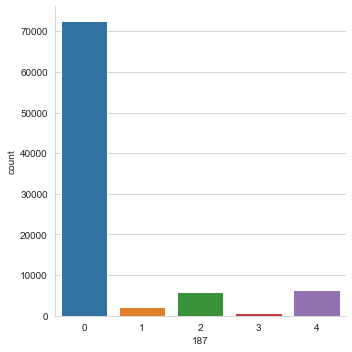

In [43]:
sns.catplot(x = 187, kind = 'count', data = train_df_original)


In [52]:
target_train = train_df[187]
target_test = test_data[187]
target_train_original = train_df_original[187]


In [54]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(target_train)
y_train_original = to_categorical(target_train_original)
y_test = to_categorical(target_test)

In [49]:
x_train = train_df.iloc[:, :-1].values
x_test = test_data.iloc[:, :-1].values
x_train_original = train_df_original.iloc[:, :-1].values

building the cnn learning model

In [32]:
from keras.models import Sequential
from keras.layers import Dense # for fully connected layers dense will be used
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

# avoid overfitting by normalizing the samples
from keras.layers.normalization import BatchNormalization

In [33]:
def build_model():
    model = Sequential()
    model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same', input_shape = (187, 1))) #we pass individual values hence not 100000,187,1
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))
    model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))
    model.add(Conv1D( filters = 128, kernel_size = 6, activation='relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))
    model.add(Flatten())
    model.add(Dense(units = 64, activation='relu'))
    model.add(Dense(units =128, activation='relu'))
    model.add(Dense(units = 5, activation='softmax'))
    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [34]:
model = build_model()

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 187, 64)           448       
_________________________________________________________________
batch_normalization_3 (Batch (None, 187, 64)           256       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 94, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 94, 64)            24640     
_________________________________________________________________
batch_normalization_4 (Batch (None, 94, 64)            256       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 47, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 47, 128)          

In [57]:
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
X_train_original = x_train_original.reshape(x_train_original.shape[0],x_train_original.shape[1],1)
X_test = x_test.reshape(x_test.shape[0],X_test.shape[1],1)

In [60]:
X_train.shape

(75000, 187, 1)

trainiing the model for sampled dataset(augmented dataset)

In [39]:
history = model.fit(X_train, y_train, epochs = 6, batch_size = 32, validation_data=(X_test, y_test))

Epoch 1/6
2344/2344 [==============================] - 54s 23ms/step - loss: 0.1673 - accuracy: 0.9407 - val_loss: 0.3132 - val_accuracy: 0.8999
Epoch 2/6
2344/2344 [==============================] - 55s 24ms/step - loss: 0.0878 - accuracy: 0.9695 - val_loss: 0.1240 - val_accuracy: 0.9606
Epoch 3/6
2344/2344 [==============================] - 58s 25ms/step - loss: 0.0599 - accuracy: 0.9801 - val_loss: 0.1464 - val_accuracy: 0.9571
Epoch 4/6
2344/2344 [==============================] - 56s 24ms/step - loss: 0.0469 - accuracy: 0.9847 - val_loss: 0.1145 - val_accuracy: 0.9716
Epoch 5/6
2344/2344 [==============================] - 58s 25ms/step - loss: 0.0380 - accuracy: 0.9877 - val_loss: 0.1190 - val_accuracy: 0.9665
Epoch 6/6
2344/2344 [==============================] - 58s 25ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.2527 - val_accuracy: 0.9579


In [40]:
model.save(r"models/sampled_model.h5")

In [51]:
model_2 = build_model()

training the model with original data (unaugmented dataset)

In [61]:
history_2= model_2.fit(X_train_original, y_train_original, epochs = 6, batch_size = 32, validation_data=(X_test, y_test))

Epoch 1/6
2737/2737 [==============================] - 64s 23ms/step - loss: 0.1775 - accuracy: 0.9497 - val_loss: 0.0969 - val_accuracy: 0.9736
Epoch 2/6
2737/2737 [==============================] - 67s 24ms/step - loss: 0.0775 - accuracy: 0.9782 - val_loss: 0.1042 - val_accuracy: 0.9716
Epoch 3/6
2737/2737 [==============================] - 68s 25ms/step - loss: 0.0570 - accuracy: 0.9838 - val_loss: 0.0683 - val_accuracy: 0.9822
Epoch 4/6
2737/2737 [==============================] - 69s 25ms/step - loss: 0.0470 - accuracy: 0.9856 - val_loss: 0.0711 - val_accuracy: 0.9812
Epoch 5/6
2737/2737 [==============================] - 71s 26ms/step - loss: 0.0443 - accuracy: 0.9868 - val_loss: 0.0699 - val_accuracy: 0.9812
Epoch 6/6
2737/2737 [==============================] - 72s 26ms/step - loss: 0.0360 - accuracy: 0.9881 - val_loss: 0.0844 - val_accuracy: 0.9781


In [64]:
model_2.save(r"models/original_model.h5")

<AxesSubplot:>

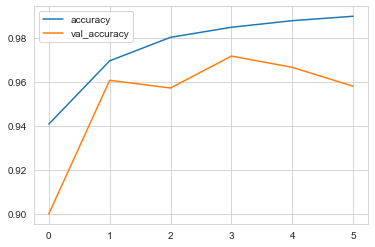

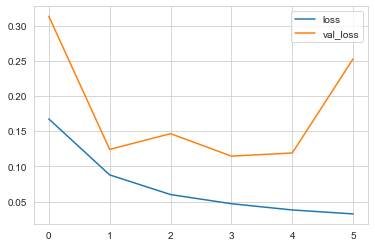

In [66]:
history_data=pd.DataFrame(history.history)
history_data[['accuracy', 'val_accuracy']].plot()
history_data[['loss', 'val_loss']].plot()

<AxesSubplot:>

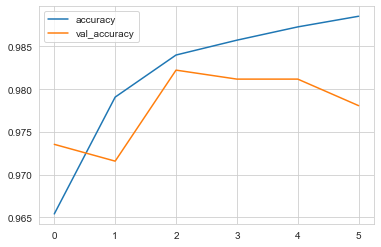

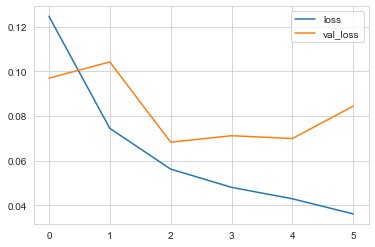

In [68]:
history_2_data=pd.DataFrame(history_2.history)
history_2_data[['accuracy', 'val_accuracy']].plot()
history_2_data[['loss', 'val_loss']].plot()